# Simple Neural Network

Simple Red Neuronal (Perceptrón) para la materia Tecnologías Exponenciales - TIC

Inspirado en https://github.com/jonasbostoen/simple-neural-network

Entradas: Personajes animados - Chistes - Muerte - Tension - Amor - Miedo - Extraterrestres - Armas - Personajes realistas

Salidas: accion, comedia, drama, ciencia ficción, terror, romance

### Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [ ]:
np.random.seed(1)

### Funciones

In [ ]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)


Sigmoid Function
$$\operatorname{f}(x)=\frac{1}{1+e^{(-x)}}$$

Sigmoid Derivative Function
$$\operatorname{f'}(x)=x \times (1-x)$$

#### Visualización Función Sigmoide

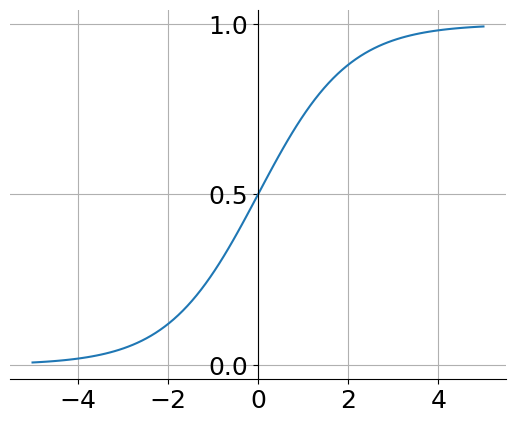

In [ ]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

## Setup

### Values

#### Training Values

In [ ]:
category_order = {
    "Personajes animados": 0,
    "Chistes": 1,
    "Muerte": 2,
    "Tensión": 3,
    "Amor": 4,
    "Miedo": 5,
    "Extraterrestres": 6,
    "Armas": 7,
    "Personajes realistas": 8
}

In [ ]:
training_inputs = np.array([
    [0,1,1,0,0,1,1,1,0],
    [1,1,1,0,1,0,0,0,0],
    [1,0,0,1,0,0,1,1,1],
    [0,0,1,1,0,1,0,0,1],
    [0,1,1,1,1,0,1,1,0],
    [1,1,1,0,0,1,0,0,0]
])

training_outputs = np.array([ [1, 1, 0, 1, 0, 1],
                              [0, 1, 0, 1, 1, 0],
                              [1, 0, 1, 0, 0, 1],
                              [0, 1, 1, 1, 1, 1],
                              [0, 1, 1, 0, 0, 1],
                              [0, 1, 1, 0, 1, 0],
                             ]).T

display(training_inputs)
display(training_outputs)

array([[0, 1, 1, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0]])

array([[1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0]])

In [ ]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

0,1,1,0,0,1,1,1,0,1,0,1,0,0,0
1,1,1,0,1,0,0,0,0,1,1,0,1,1,1
1,0,0,1,0,0,1,1,1,0,0,1,1,1,1
0,0,1,1,0,1,0,0,1,1,1,0,1,0,0
0,1,1,1,1,0,1,1,0,0,1,0,1,0,1
1,1,1,0,0,1,0,0,0,1,0,1,1,1,0


#### Synaptic weights

In [ ]:
training_inputs.shape

(6, 9)

In [ ]:
training_outputs.shape

(6, 6)

In [ ]:
n = training_inputs.shape[1]
m = training_outputs.shape[1]
synaptic_weights = 2 + np.random.random((n, m)) - 1

synaptic_weights

array([[1.417022  , 1.72032449, 1.00011437, 1.30233257, 1.14675589,
        1.09233859],
       [1.18626021, 1.34556073, 1.39676747, 1.53881673, 1.41919451,
        1.6852195 ],
       [1.20445225, 1.87811744, 1.02738759, 1.67046751, 1.4173048 ,
        1.55868983],
       [1.14038694, 1.19810149, 1.80074457, 1.96826158, 1.31342418,
        1.69232262],
       [1.87638915, 1.89460666, 1.08504421, 1.03905478, 1.16983042,
        1.8781425 ],
       [1.09834683, 1.42110763, 1.95788953, 1.53316528, 1.69187711,
        1.31551563],
       [1.68650093, 1.83462567, 1.01828828, 1.75014431, 1.98886109,
        1.74816565],
       [1.28044399, 1.78927933, 1.10322601, 1.44789353, 1.9085955 ,
        1.29361415],
       [1.28777534, 1.13002857, 1.01936696, 1.67883553, 1.21162812,
        1.26554666]])

In [ ]:
print(training_inputs.shape)

(6, 9)


## Training

Para obtener un resultado a partir de los inputs y los synaptic weights se realiza la siguiente función:

$$\sum_{i=0}^{n}{x_iw_i}$$

Y se le aplica la función sigmoide para normalizar al rango 0, 1

Por ejemplo, si nuestros inputs $x_i$ son `[1, 1, 1]` y nuestros pesos sinapticos $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Nos resulta la cuenta
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

Con la función sigmoide es facil ver como $$\operatorname{sigmoid}(5.65) \approx 1$$

In [ ]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

In [ ]:
eval_NN(training_inputs, synaptic_weights).shape

(6, 6)

In [ ]:
# 50000 epochs
for iteration in range(50000):

    # Arranca con los valores de training
    input_layer = training_inputs

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights)

    # Calculo el error

    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

In [ ]:
outputs.shape

(6, 6)

In [ ]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[ 2.32178105e+00 -4.80147676e+00  4.96295778e+00  5.39207608e+00
   9.52290584e+00  2.56155388e+00]
 [ 2.00193664e+00 -1.36793024e+00  7.07859082e-01  1.06082307e+00
   1.03679699e+00 -7.05148726e-03]
 [ 3.87046444e+00  4.03422666e+00 -3.98794195e+00  9.17665253e-01
  -2.57233224e+00 -1.34275762e+00]
 [-3.83329487e+00  2.94169505e+00 -3.24793995e+00  5.37833025e+00
  -1.67711604e+00  1.77708281e+00]
 [-2.16404051e+00  7.76684712e+00 -7.30415638e+00  4.62914438e+00
  -9.69315607e-01  4.65097273e+00]
 [ 5.78960901e+00 -3.40001150e+00  3.84272097e+00 -1.52775816e+00
  -2.18118961e+00 -7.13325239e+00]
 [-2.61159557e+00 -2.72242758e+00  3.69358573e+00 -3.01936994e+00
  -1.16297777e+00  6.98247421e-01]
 [-3.06513686e+00 -3.64847889e+00  3.00185446e+00 -3.03358048e+00
  -1.14182761e+00  1.25258187e+00]
 [ 4.92761309e-01  2.18858314e+00 -2.36689356e+00  2.12622271e+00
   4.43532115e-01  8.13883987e-02]]
Outputs after training: 
[[9.97490772e-01 8.20636754e-04 9

## Eval

In [ ]:
table(training_values)

0,1,1,0,0,1,1,1,0,1,0,1,0,0,0
1,1,1,0,1,0,0,0,0,1,1,0,1,1,1
1,0,0,1,0,0,1,1,1,0,0,1,1,1,1
0,0,1,1,0,1,0,0,1,1,1,0,1,0,0
0,1,1,1,1,0,1,1,0,0,1,0,1,0,1
1,1,1,0,0,1,0,0,0,1,0,1,1,1,0


In [ ]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [ ]:
a = 1 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
b = 1 #@param {type:"integer"}
d = 0 #@param {type:"integer"}
e = 0 #@param {type:"integer"}
f = 1 #@param {type:"integer"}
g = 0 #@param {type:"integer"}
h = 1 #@param {type:"integer"}
i = 0 #@param {type:"integer"}

input_layer = np.array([a, b, c,d,e,f,g,h,i])
res = sigmoid(np.dot(input_layer, synaptic_weights))
display(res)

thresh = 0.01
#out = 0 if res < thresh else 1
out = np.where(res < thresh,0,1)

large(out)

array([9.99981883e-01, 1.02692298e-04, 9.99802080e-01, 9.43172336e-01,
       9.90662666e-01, 9.29513305e-03])

BONUS\
1) Para que la red admita n candidad de entradas con k candidad de capas ocultas, es cambiar la funcion de activación. En este caso estamos utilizando un perceptron que tiene esta pinta:\
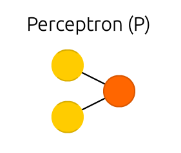\
Pero al cambiar la funcion por una Feed Foward o una Radial Basis Network, logramos tener una red mas compleja con mas conexiones que complejizan la red y permiten n cantidad de entradas y a su vez sumas hidden layers. Nos quedaria algo asi:\
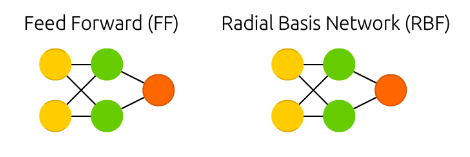\
Ya para terminar, si se quiere una red con más hidden layers y mas cantidad de datos de entradas, para un mejor manejo de datos se puede utilizar Deep Feed Foward, que se ve de la siguiente manera:\
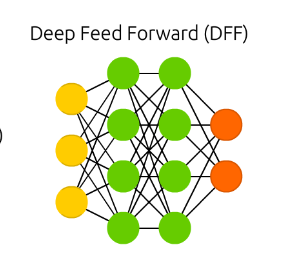

2) La función Softmax se utiliza para convertir las salidas de una capa en probabilidades que suman 1, lo que ayuda a facilitar la interpretación de los resultados. Al generar probabilidades, no es bueno para problemas de salida binaria (dos opciones) porque se va a los extremos, pero para clasificación multiclase (como el ejercicio que tuvimos que resolver) si es útil. A cada salida se le asigna una probabilidad de ser la correcta y de alli se mide la confianza para el modelo. Esto es útil cunado queremos saber si una entrada pertenece a una clase.
La diferencia con la funcion sigmoide que es lo que cambiaria la forma de salida del modelo, es que en esta primera se le asigna a un resultado un valor entre 0 y 1 de ser la correcta. Por otro lado, como dijimos antes, en la función Softmax, todos los resultados reciben un valor porcentual que suman 1 dependiendo su propabilidad de ser o no la correcta


Estructura de la Red:
La red neuronal es como un cerebro artificial que puede aprender de ejemplos. Está formada por "neuronas" interconectadas organizadas en capas: una capa de entrada , una o más capas ocultas ,donde ocurre el procesamiento,, y una capa de salida ,donde obtenemos los resultados.

Función de Activación:
Ponele que cada neurona en la red es como un interruptor de luz. La función de activación decide si la neurona debe "prenderse" (1) o "apagarse" (0) en base a la información que recibe. En este caso, se utiliza la función sigmoide, que convierte cualquier número en un valor entre 0 y 1. Si el resultado es cercano a 1, la neurona se activa completamente; si es cercano a 0, está apagada.

Forward Propagation :
Es como el proceso de pensar. Los datos de entrada viajan a través de la red, pasando por cada neurona y sus conexiones. Cada neurona realiza ciertas operaciones matemáticas ,como multiplicaciones y sumas, y luego aplica la función de activación. Así, la información se propaga desde la entrada hasta la salida, y obtenemos un resultado.

Back Propagation :
Este es el proceso de aprendizaje. Después de obtener un resultado, comparamos este resultado con el resultado esperado. Si hay un error ,diferencia entre lo que la red dijo y lo que debería haber dicho, el sistema ajusta las conexiones entre las neuronas para reducir ese error. Es como corregir errores para mejorar el rendimiento futuro de la red.

Gradiente Descendente:
Pensemos que el proceso de ajuste de las conexiones entre las neuronas para reducir el error es como encontrar la cima de una montaña en la oscuridad. Gradiente descendente es como encontrar el camino más rápido para llegar a la cima. La red te va diciendo qué tan equivocada está y ajusta las conexiones en la dirección que reduce más rápidamente ese error. Es un proceso iterativo que se repite muchas veces hasta que el error sea lo suficientemente bajo.

Donde estan estos ejemplos:

Estructura de la Red:
Se define la estructura de la red en esta línea: synaptic_weights = 2 + np.random.random((n, m)) - 1. synaptic_weights representa las conexiones entre las neuronas en la red.
Función de Activación:

La función de activación sigmoide está definida como sigmoid(x) = 1 / (1 + np.exp(-x)).
Forward Propagation (Propagación hacia adelante):

La propagación hacia adelante ocurre en el bucle for iteration in range(50000). En cada iteración, los datos de entrada (input_layer) se multiplican por las synaptic_weights y se pasa a través de la función de activación sigmoide (outputs = eval_NN(input_layer, synaptic_weights)).
Back Propagation (Retropropagación):

La retropropagación ocurre en este código:
error = training_outputs - outputs
adjustments = error * sigmoid_derivative(outputs)
synaptic_weights += np.dot(input_layer.T, adjustments)
Aquí, se calcula el error entre las salidas reales y las predicciones, y luego se ajustan las synaptic_weights para reducir ese error.

Gradiente Descendente:
El gradiente descendente se aplica en esta línea: synaptic_weights += np.dot(input_layer.T, adjustments). Aquí, se ajustan las conexiones (synaptic_weights) en función del error y las entradas (input_layer) para minimizar el error.